# Coins classification
---

Complete the following cells in order to classify the following coins images:

![coins](images/coins.png)

as follows:

![coins classification](images/coins_classification.png)

Large coins count as 5 units, small copper coins count as 0.5 units, while small silver coins count as 1 unit.

#### Basic imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Adds plots to the Jupyter notebook instead of the terminal
%matplotlib inline

(718, 957, 3)


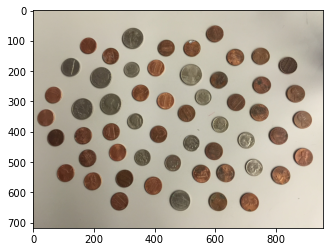

In [2]:
coins = cv2.imread('images/coins.png')
coins = cv2.cvtColor(coins, cv2.COLOR_BGR2RGB)

print(coins.shape)

plt.imshow(coins)

1. Select a color space that allows you to obtains a specific, and useful, characteristic from the coin image. Plot an image of said characteristic from the coins image. Remember to apply all the preprocessing steps that may be requiered.

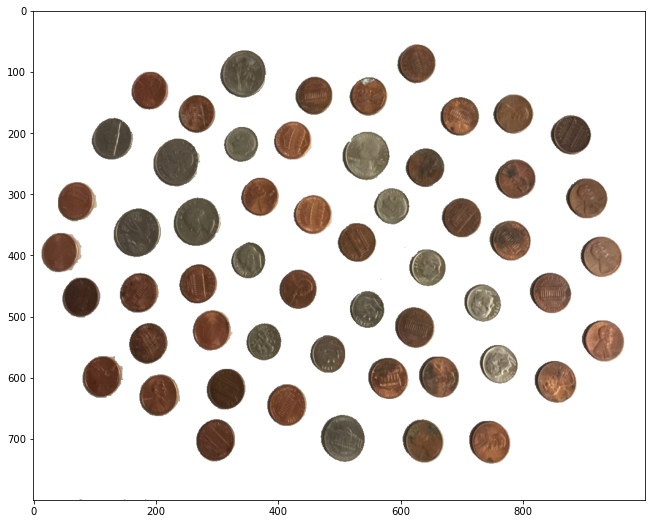

In [3]:
coins_copy = np.copy(coins)

# TO DO: Obtain a characteristic and plot it.
coins_copy = cv2.resize(coins_copy, (1000, 800))
coins_hsv = cv2.cvtColor(coins_copy, cv2.COLOR_RGB2HSV)

kernel = np.ones((9,9), np.uint8)

# Los verdaderos valores de HSV estan comentados 
lower_hue = np.array([0, 0, 100]) # 0, 0, 39
upper_hue = np.array([40, 45, 255]) # 56, 17, 100

mask = cv2.inRange(coins_hsv, lower_hue, upper_hue)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

masked_coins = np.copy(coins_copy)
masked_coins[mask != 0] = [255, 255, 255]

f1, ax1 = plt.subplots(figsize=(19,9))

ax1.imshow(masked_coins, cmap="gray")

2. Obtain the coin contours and plot and image of all the contours. Add all the code cells that may be required.

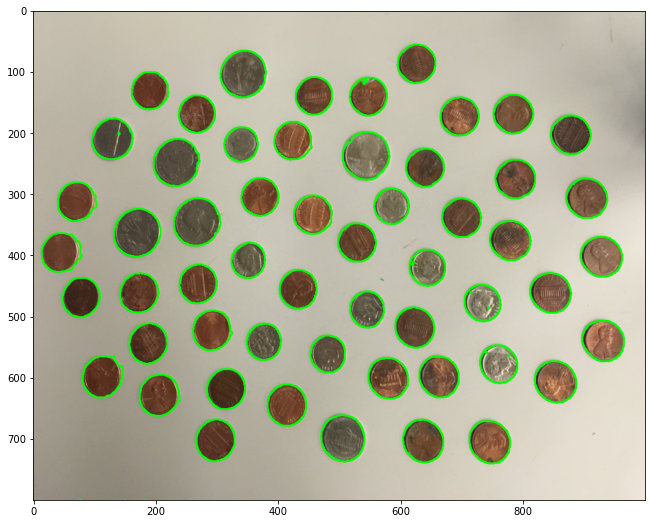

In [4]:
# TO DO: Plot an image of the contours of the coins.
masked_coins_rgb = np.copy(masked_coins)
masked_coins_rgb = cv2.cvtColor(masked_coins, cv2.COLOR_HSV2RGB)
gray_coins = cv2.cvtColor(masked_coins_rgb, cv2.COLOR_RGB2GRAY)

retval, binary = cv2.threshold(gray_coins, 163, 255, cv2.THRESH_BINARY_INV)

(contours, _) = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

coins_contours = np.copy(coins_copy)

coins_contours = cv2.drawContours(coins_contours, contours, -1, (0,255,0), 2)

f1, ax1 = plt.subplots(figsize=(19,9))

ax1.imshow(coins_contours, cmap="gray")

3. Using the contour features, obtain any feature that may be useful to classify the coins. Store the feature in a dictionary for future reference.

In [5]:
# TO DO: Obtain a useful contour feature to clasify the coins.
areas = []

for idx, selected_contour in enumerate(contours):
    if (selected_contour is not None):
        area = cv2.arcLength(selected_contour, True)
        areas.append(area)

        # print(f"Area {idx}: {area}")

4. Separate the coins based on color. Obtain the average color of each coin, and store this information in a dictionary.

In [6]:
# Function that will obtain the average color of each coin
def avg_color(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    h_sum = 0

    for x in range(hsv_image.shape[1]):
        for y in range(hsv_image.shape[0]):
            # If its not equal to bright purple or bright green...
            if hsv_image[y, x, 0] != 212.5 and hsv_image[y, x, 0] != 85:
                h_sum += hsv_image[y, x, 0]
        
    avg = h_sum / (400*500)

    return avg

In [7]:
# TO DO: Obtain the average color of each coin, and store ir for future use.
avg_colors = []

selected_contour = contours[4]

for selected_contour in contours:
    if (selected_contour is not None):
        cropped_image = np.copy(coins_copy)

        x,y,w,h = cv2.boundingRect(selected_contour)

        _ = cv2.rectangle(cropped_image, (x,y), (x+w,y+h), (200,0,200), 2)
        cropped_image = cropped_image[y: y + h, x: x + w]

        avg_colors.append(avg_color(cropped_image))

5. Using the information that you generated, plot an image that adds a text with the value of each coin to the image at the position of each coin. Large coins are worth 5 units, small silver coins are worth 1 unit, while small copper coins are worth 0.5 units.

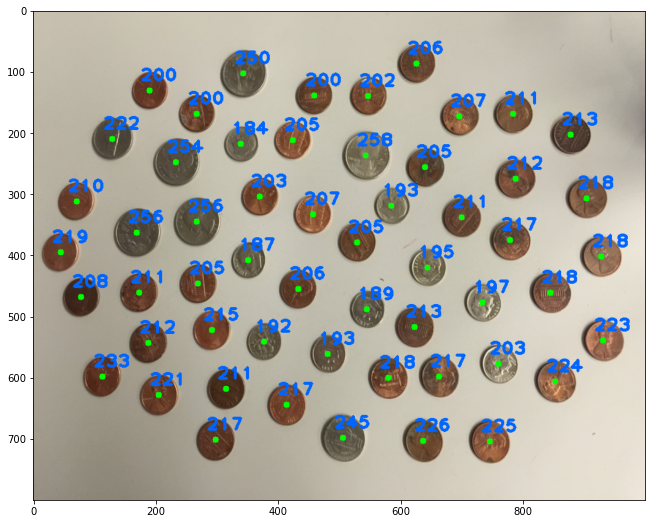

In [13]:
# TO DO: Using the dictionaries that you created, plot an image with the correct coin values
# Copper: 105 - 115,

cropped_image = np.copy(coins_copy)

for idx, selected_contour in enumerate(contours):
    if (selected_contour is not None):
        moments = cv2.moments(selected_contour)

        if moments["m00"] != 0 and areas[idx] > 70 and avg_colors[idx] > 0.1:
            cx = int(moments['m10']/moments['m00'])
            cy = int(moments['m01']/moments['m00'])

            text = str(round(areas[idx]))

            cv2.circle(cropped_image, (cx, cy), 5, (0, 255, 0), -1)

            cv2.putText(cropped_image, text, (cx-15, cy-15), cv2.FONT_HERSHEY_PLAIN, 2, (0, 100, 255), 3, cv2.LINE_8)

f1, ax1 = plt.subplots(figsize=(19,9))

ax1.imshow(cropped_image, cmap="gray")